In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # Image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [4]:
## Load Image
url= "https://channeli.in/api/django_filemanager/media_files/12069/"
myImg = io.imread(url)

In [6]:
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray_image), float)
print(img_mat)


[[207. 207. 207. ... 244. 244. 244.]
 [207. 207. 208. ... 244. 244. 244.]
 [208. 208. 208. ... 244. 244. 244.]
 ...
 [201. 206. 210. ... 120. 120. 120.]
 [199. 204. 209. ... 121. 121. 120.]
 [191. 197. 202. ... 122. 121. 120.]]


(720, 960)

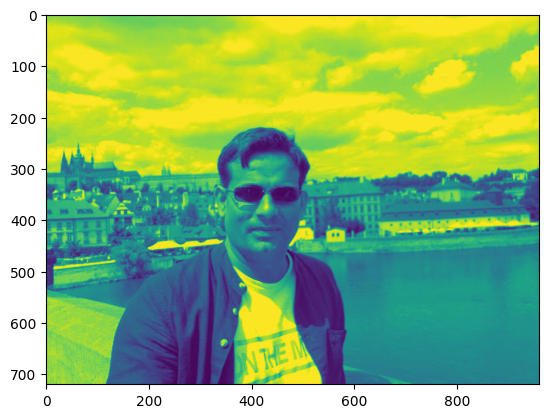

In [9]:
plt.imshow(img_mat)
img_mat.shape

In [10]:
# Scal the image before applying the SVD such that the mean will become 0 and the standard deviation will become 1 why? IDK
img_mat_scaled = (img_mat - img_mat.mean())/img_mat.std()

In [12]:
u, s, v = np.linalg.svd(img_mat_scaled)
u
s
v

array([[ 0.02075989,  0.0213149 ,  0.02143805, ...,  0.03176049,
         0.03166697,  0.03167346],
       [ 0.04716245,  0.04774504,  0.04721619, ...,  0.01841021,
         0.01877972,  0.0190784 ],
       [ 0.01594615,  0.01418765,  0.01474956, ...,  0.01869596,
         0.01775126,  0.01697493],
       ...,
       [ 0.00752439, -0.01637459,  0.01525366, ...,  0.25144977,
        -0.09574002, -0.03562044],
       [-0.0064706 ,  0.00654805, -0.00604904, ..., -0.09056506,
         0.33821534, -0.17595839],
       [-0.00582115,  0.00078207,  0.02083341, ..., -0.01170699,
        -0.19744514,  0.19520868]])

In [15]:
u.shape
s.shape
v.shape

(960, 960)

In [18]:
# compute variance
var_explained = np.round(s**2/np.sum(s**2), decimals=3)

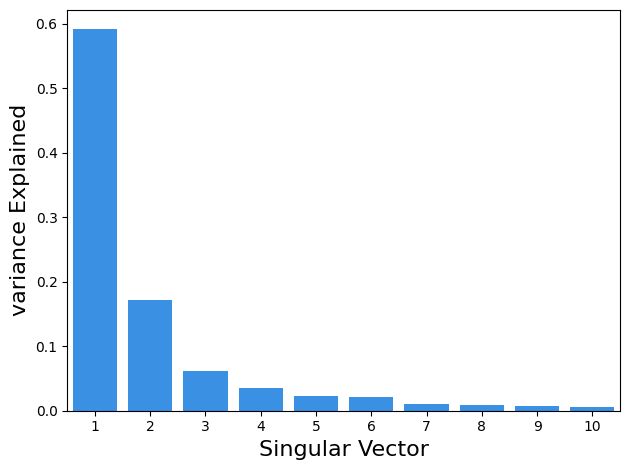

In [20]:
import seaborn as sns
sns.barplot(x=list(range(1,11)), y=var_explained[0:10], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd-scree_plot.png', dpi=150)

In [ ]:
# Reconstruction with top 5 singular values
num_componenets = 5
reconst_img_5 = np.array(u[:,:num_componenets]).dot(np.diag(s[:num_componenets])) np.array(v[:num_componenets,:])